<a href="https://colab.research.google.com/github/ella-bnz05/Portfolio-COSC110/blob/main/lab2_titanic_BAEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORY ACTIVITY 2

## QUESTIONS

### Question No. 1

*What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?*

1. Load the dataset.
2. Understand the data.
3. Remove irrelevant columns such as PassengerId.
4. Check the missing values.
5. Fill the Age column's missing values with the median age.
6. For Cabin column, extract the first letter of the deck if available, else estimate based on class & fare. If both can't be done just drop the column.
7. Fill the Embarked column's missing values, which is only two, with the most commone value.
8. Convert the Survived and Pclass Column into categorical column to save storage.
9. Check for duplicate entries and remove them if found.
10. Standardized column names to avoid confusion.
11. Save the cleaned dataset for analysis.


This algorithm was utilized to handle missing values, remove unnecessary data, and improve the dataset for analysis.

By understanding the data, you can identify important aspects such as data types, missing values, and potential issues before cleaning. Removing the PassengerId column is necessary since it is unique and does not contribute to the analysis.

Using the median for missing ages ensures that the estimated values are more representative of most passengers' age. Handling missing Cabin values can help analyze which parts of the Titanic had the highest survival rates. However, if estimating the cabin locations is not feasible, the column can be dropped. For missing Embarked values, only two entries are missing, so replacing them with the mode, most frequent value, is a reasonable approach.

Converting Survived and Pclass into categorical data saves memory and improves processing speed. Checking for duplicate entries and removing is part of cleaning the data and prevents biases in analysis. Standardizing column names helps avoid confusion when analyzing and visualizing data. Lastly, saving the data is necessary for further analysis.

### Question No. 2

*Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.*



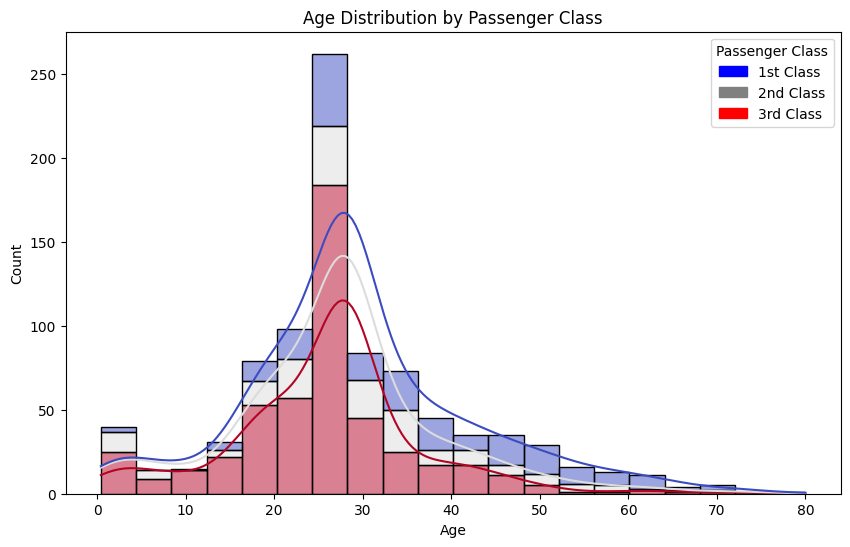

In [60]:
from matplotlib.patches import Patch
# Plot the age distribution for each class
plt.figure(figsize=(10, 6))
sns.histplot(df, x="age", hue="pclass", bins=20, edgecolor="black", kde=True, palette="coolwarm", multiple="stack")

# Labels and title
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Age")
plt.ylabel("Count")

legend_labels = [Patch(color="blue", label="1st Class"),
                 Patch(color="gray", label="2nd Class"),
                 Patch(color="red", label="3rd Class")]

plt.legend(handles=legend_labels, title="Passenger Class")


# Show the plot
plt.show()
The

*The two columns used are the **age** and the **passenger class**.*


**Legend:**



*   1st Class- Red
*   2nd Class - Gray
*   3rd Class - Red


**First Insight**



*  The visualization shows that third-class passengers were mostly young adults and children, likely families or immigrants seeking better opportunities. Second-class had a mix of young and middle-aged people, most likely professionals and middle-class families. First-class passengers were generally older, around 40 to 60 years old, and likely wealthy with their families.


---




**Second Insight**



*  The age differences among passenger classes show a clear link between social status and financial ability. First-class tickets were costly, so wealthier individuals, such as businesspeople or retirees, could afford better accommodations and amenities. In contrast, third-class had lower fares, attracting younger passengers, including workers, laborers, and immigrants.
Also, there are more third-class passengers as more likely they have accomdations where they share with other people. These differences also affected survival rates, first-class passengers had easier access to lifeboats, while third-class passengers, often in the lower decks, struggled to escape the sinking ship.



## Lab Instructions

In [61]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

### Step 1: Load the Data

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

### Step 2: Understand the Data

In [ ]:
df.info()
df.describe()
df.columns

*Notes: There are a total of 891 entries, yet the columns Age, Cabin, and Embarked has a lower value of entries. Age has 714 entries, Cabin has 204 entries, and Embarked has 889 entries.*

### Step 3: Check for Missing Values

In [71]:
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


*Note: The Age Column has 177 missing data, the Cabin has 687 missing data, and the Embarked has 2 missing data.*

### Step 4: Handle Missing Values

In [ ]:
df = df.copy()
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Deck'] = df['Cabin'].str[0]

# Define deck mapping based on Pclass and Fare
def estimate_deck(row):
    if pd.notna(row['Deck']):  # If Deck is already known, keep it
        return row['Deck']
    elif row['Pclass'] == 1:
        return 'A' if row['Fare'] > 80 else 'B' if row['Fare'] > 50 else 'C'
    elif row['Pclass'] == 2:
        return 'D' if row['Fare'] > 30 else 'E'
    elif row['Pclass'] == 3:
        return 'F' if row['Fare'] > 10 else 'G'
    return None  # If no reliable estimation can be made

# Apply deck estimation
df['Deck'] = df.apply(estimate_deck, axis=1)

df.drop(columns=["Cabin"], inplace=True)
# Display the processed DataFrame
df.head()

In [ ]:
df.drop(columns=["cabin"], inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
print(df.columns)

In [ ]:
df.to_csv("titanic_cleaned.csv", index=False)

### Basic Data Visualizations

In [ ]:
import matplotlib.pyplot as plt

### Bar Plot of Survival Count

In [ ]:
df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

### Histogram of Age Distribution

In [ ]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

### Survival by Gender

In [ ]:
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("titanic_cleaned.csv")
df.info()
df.describe()
df.columns

In [ ]:
df['deck'] = df['deck'].astype(str)

# Group by deck and calculate the survival rate
deck_survival = df.groupby("deck")["survived"].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
deck_survival.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Survival Rate by Deck")
plt.ylabel("Survival Rate")
plt.xlabel("Deck")
plt.xticks(rotation=0)  # Keep deck labels readable
plt.ylim(0, 1)  # Ensure survival rate is within valid range (0-1)

# Show the plot
plt.show()